In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [96]:
source_dir = "images/"
save_dir = "save/"


In [46]:
image1 = cv2.imread(source_dir + "Hist1.jpeg", 0)
image2 = cv2.imread(source_dir + "Hist2.jpg", 0)

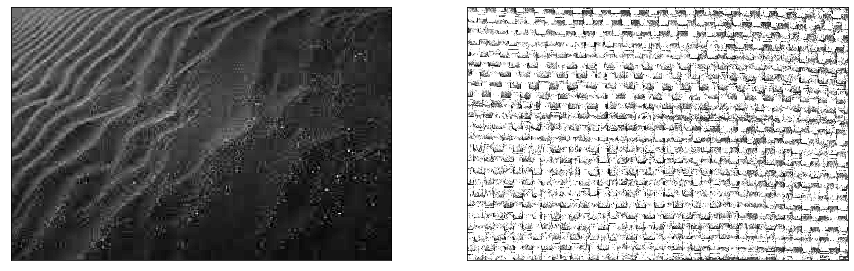

In [57]:
plt.figure(figsize=[15,5])
plt.subplot(121)
plt.imshow(image1, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(image2, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()

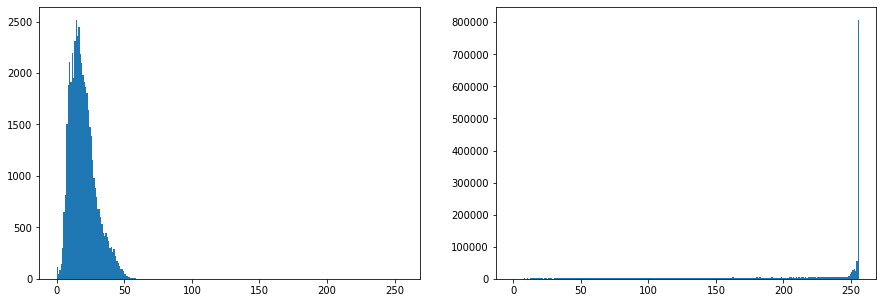

In [62]:
plt.figure(figsize=[15,5])
plt.subplot(121)
plt.hist(image1.ravel(), 256, [0, 256])
plt.subplot(122)
plt.hist(image2.ravel(), 256, [0, 256])
plt.show()

In [72]:
def plot_cdf(image):
    hist, bins = np.histogram(image.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    plt.hist(image.flatten(), 256, [0, 256], color="red")
    plt.plot(cdf_normalized, color="b")
    return cdf

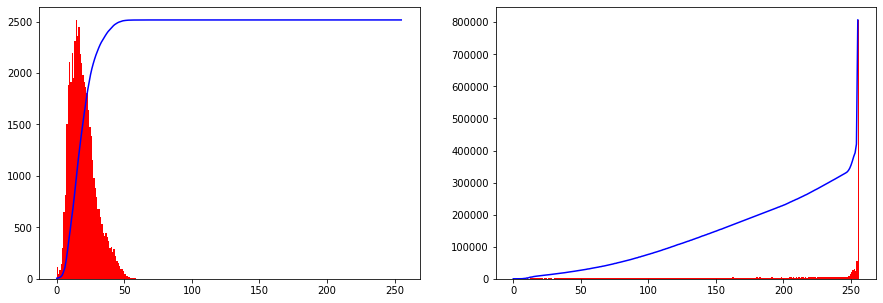

In [81]:
plt.figure(figsize=[15,5])
plt.subplot(121)
cdf1 = plot_cdf(image1)
plt.subplot(122)
cdf2 = plot_cdf(image2)
plt.show()

#### Histogram Equalization for image1

In [89]:
cdf_m = np.ma.masked_equal(cdf1,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf1 = np.ma.filled(cdf_m,0).astype('uint8')

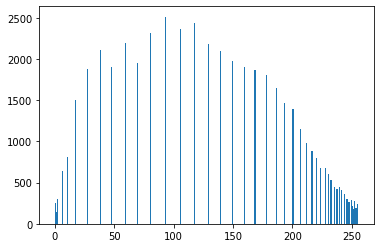

In [92]:
image1_converted = cdf1[image1]
plt.hist(image1_converted.flatten(), 256, [0, 256])
plt.show()

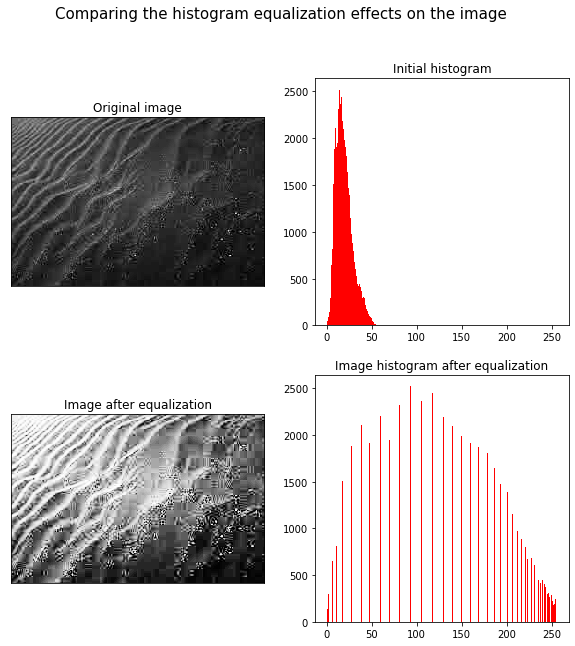

In [100]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.suptitle("Comparing the histogram equalization effects on the image", fontsize=15)
plt.imshow(image1, cmap="gray"), plt.xticks([]), plt.yticks([]), plt.title("Original image")

plt.subplot(222)
plt.hist(image1.flatten(), 256, [0, 256], color='r'), plt.title("Initial histogram")

plt.subplot(223)
plt.imshow(image1_converted, cmap="gray"), plt.xticks([]), plt.yticks([]), plt.title("Image after equalization")

plt.subplot(224)
plt.hist(image1_converted.flatten(), 256, [0, 256], color='r'), plt.title("Image histogram after equalization")
plt.savefig(save_dir + "figure1")
plt.show()


#### Histogram Equalization for image 2

In [87]:
cdf_m = np.ma.masked_equal(cdf2,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf2 = np.ma.filled(cdf_m,0).astype('uint8')

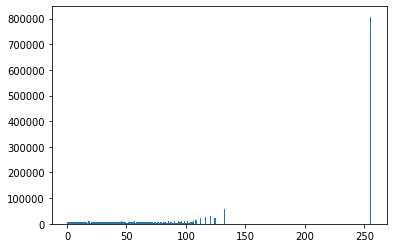

In [91]:
image2_converted = cdf2[image2]
plt.hist(image2_converted.flatten(), 256, [0, 256])
plt.show()

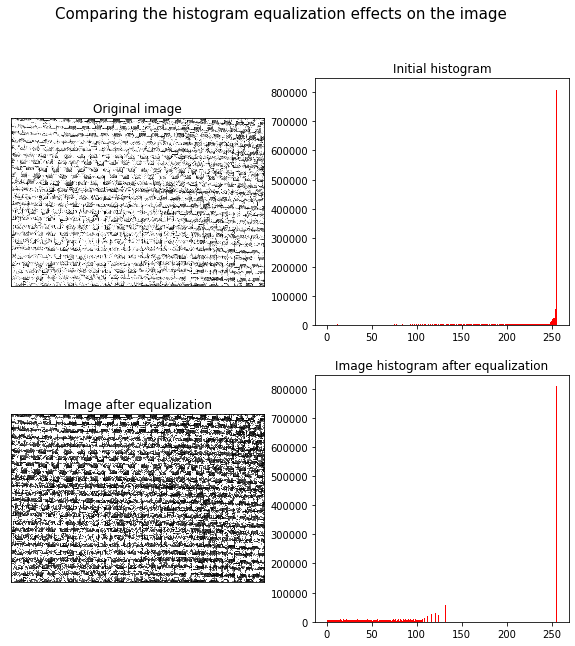

In [99]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.suptitle("Comparing the histogram equalization effects on the image", fontsize=15)
plt.imshow(image2, cmap="gray"), plt.xticks([]), plt.yticks([]), plt.title("Original image")

plt.subplot(222)
plt.hist(image2.flatten(), 256, [0, 256], color='r'), plt.title("Initial histogram")

plt.subplot(223)
plt.imshow(image2_converted, cmap="gray"), plt.xticks([]), plt.yticks([]), plt.title("Image after equalization")

plt.subplot(224)
plt.hist(image2_converted.flatten(), 256, [0, 256], color='r'), plt.title("Image histogram after equalization")
plt.savefig(save_dir + "figure2")
plt.show()
